In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/TextClassification

/content/drive/My Drive/Colab Notebooks/TextClassification


In [24]:
import pandas as pd
import csv

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
## Check if Cuda is Available
print(torch.cuda.is_available())

True


In [6]:
train_raw = pd.read_json("data/train.jsonl", lines=True, encoding="utf-8")
test_raw = pd.read_json("data/test.jsonl", lines=True, encoding="utf-8")

In [8]:
train_raw.head()

,label,response,context
0,SARCASM,@USER @USER @USER I don't get this .. obviousl...,[A minor child deserves privacy and should be ...
1,SARCASM,@USER @USER trying to protest about . Talking ...,[@USER @USER Why is he a loser ? He's just a P...
2,SARCASM,@USER @USER @USER He makes an insane about of ...,[Donald J . Trump is guilty as charged . The e...
3,SARCASM,@USER @USER Meanwhile Trump won't even release...,[Jamie Raskin tanked Doug Collins . Collins lo...
4,SARCASM,@USER @USER Pretty Sure the Anti-Lincoln Crowd...,[Man ... y ’ all gone “ both sides ” the apoca...


In [7]:
train_raw.groupby('label').count()

,response,context
label,,
NOT_SARCASM,2500,2500
SARCASM,2500,2500


In [52]:
train_raw['response_length'] = train_raw['response'].apply(lambda x: len(x))
train_raw['context_count'] = train_raw['context'].apply(lambda x: len(x))
test_raw['response_length'] = test_raw['response'].apply(lambda x: len(x))
test_raw['context_count'] = test_raw['context'].apply(lambda x: len(x))

(array([0.000e+00, 0.000e+00, 0.000e+00, 4.000e-05, 9.800e-04, 2.580e-03,
        5.460e-03, 6.320e-03, 7.860e-03, 9.040e-03, 9.540e-03, 1.072e-02,
        1.090e-02, 5.100e-03, 2.780e-03, 2.640e-03, 2.140e-03, 2.080e-03,
        1.760e-03, 1.560e-03, 1.740e-03, 1.760e-03, 1.500e-03, 1.240e-03,
        1.460e-03, 2.080e-03, 1.700e-03, 2.440e-03, 2.460e-03, 1.660e-03,
        4.000e-04, 6.000e-05, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390]),
 <a list of 39 Patch objects>)

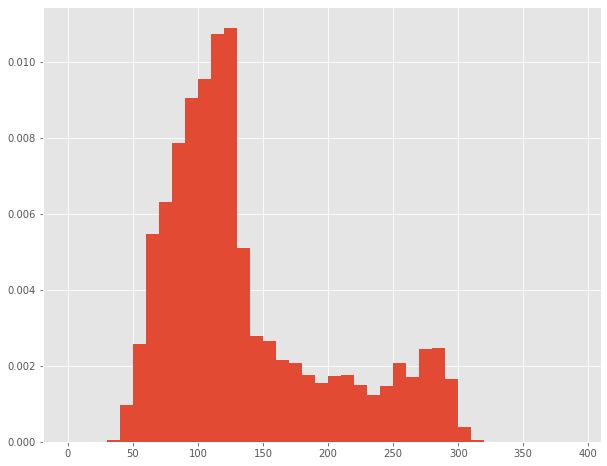

In [57]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.hist(train_raw.response_length, bins=list(range(0, 400, 10)), density=True)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.22222222e-04,
        3.16666667e-03, 6.16666667e-03, 6.22222222e-03, 5.94444444e-03,
        6.27777778e-03, 6.05555556e-03, 6.83333333e-03, 4.77777778e-03,
        4.88888889e-03, 4.38888889e-03, 4.55555556e-03, 4.55555556e-03,
        3.44444444e-03, 3.55555556e-03, 2.94444444e-03, 1.77777778e-03,
        2.22222222e-03, 2.66666667e-03, 2.11111111e-03, 1.77777778e-03,
        1.72222222e-03, 2.00000000e-03, 2.11111111e-03, 2.61111111e-03,
        3.66666667e-03, 2.11111111e-03, 6.66666667e-04, 5.55555556e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390]),
 <a list of 39 Patch objects>)

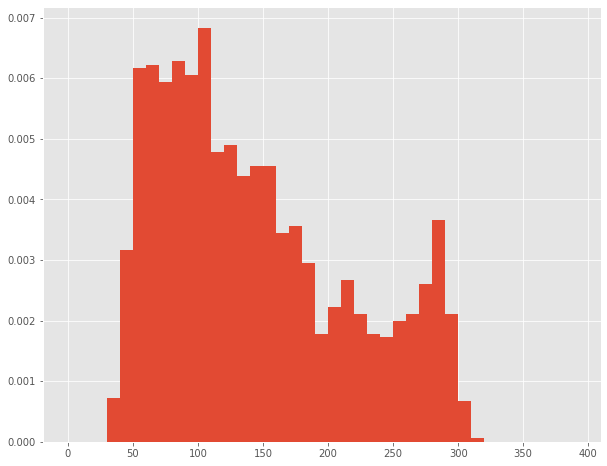

In [58]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.hist(test_raw.response_length, bins=list(range(0, 400, 10)), density=True)

(array([0.    , 0.    , 0.4832, 0.19  , 0.0964, 0.0636, 0.0402, 0.0276,
        0.0184, 0.0158, 0.0128, 0.0078, 0.0066, 0.0056, 0.0062, 0.0044,
        0.0044, 0.0044, 0.0042, 0.0046, 0.0038, 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

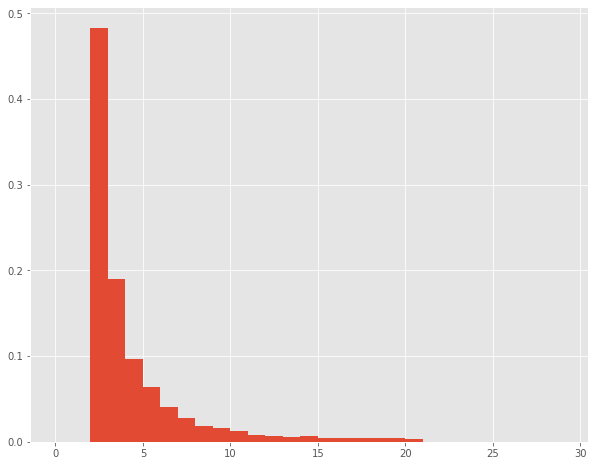

In [59]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.hist(train_raw.context_count, bins=list(range(0, 30)), density=True)

(array([0.        , 0.        , 0.52333333, 0.22388889, 0.10444444,
        0.05555556, 0.03055556, 0.02277778, 0.00944444, 0.00944444,
        0.00444444, 0.00611111, 0.00444444, 0.00166667, 0.00166667,
        0.00055556, 0.        , 0.00111111, 0.00055556, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

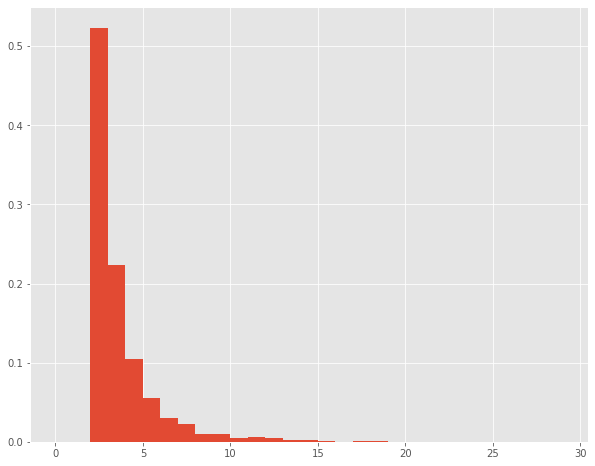

In [60]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.hist(test_raw.context_count, bins=list(range(0, 30)), density=True)

In [70]:
context_check=train_raw.groupby(['context_count']).count()
context_check['cum_sum']=context_check['label'].cumsum()
context_check['cum_pct']=context_check['cum_sum'] / context_check['label'].sum()
context_check

,label,response,context,response_length,cum_sum,cum_pct
context_count,,,,,,
2,2416,2416,2416,2416,2416,0.4832
3,950,950,950,950,3366,0.6732
4,482,482,482,482,3848,0.7696
5,318,318,318,318,4166,0.8332
6,201,201,201,201,4367,0.8734
7,138,138,138,138,4505,0.9010
8,92,92,92,92,4597,0.9194
9,79,79,79,79,4676,0.9352
10,64,64,64,64,4740,0.9480


In [71]:
print(train_raw['context_count'].mean())

3.8666


In [72]:
context_check=test_raw.groupby(['context_count']).count()
context_check['cum_sum']=context_check['id'].cumsum()
context_check['cum_pct']=context_check['cum_sum'] / context_check['id'].sum()
context_check

,id,response,context,response_length,cum_sum,cum_pct
context_count,,,,,,
2,942,942,942,942,942,0.523333
3,403,403,403,403,1345,0.747222
4,188,188,188,188,1533,0.851667
5,100,100,100,100,1633,0.907222
6,55,55,55,55,1688,0.937778
7,41,41,41,41,1729,0.960556
8,17,17,17,17,1746,0.970000
9,17,17,17,17,1763,0.979444
10,8,8,8,8,1771,0.983889


In [73]:
print(test_raw['context_count'].mean())

3.1644444444444444
